In [220]:
# MANIPULACION DE LA DATA
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None) # MUESTRA TODAS LAS COLUNAS DE UN PANDAS DATAFRAME

# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# QUITAMOS LOS WARNINGS DE LAS SALIDAS DEL NOTEBOOK
import warnings
warnings.filterwarnings("ignore")

# ESTADISTICAS
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, 
# para comprobar si tu muestra se distribuye normalmente o no.

## Carga de datasets

In [150]:
#Data Telefonía Movil

movil_ingresos_trim=pd.read_csv(r"Datasets transformados\Ingresos_trimestrales_telefonía_móvil_transformado.csv")
movil_accesos_trim=pd.read_csv(r"\Datasets transformados\Penetración_nacional_telefonía_móvil_transformado.csv")
movil_altas_mens=pd.read_csv(r"Datasets transformados\Portabilidad_altas_mensuales_por_operador_transformado.csv")
movil_minutos_trim=pd.read_csv(r"Datasets transformados\Trafico_suscriptores_telefonía_móvil_transformado.csv")

In [151]:
#Data Telefonía Fija

n_fija_ingresos_trim=pd.read_csv(r"Datasets transformados\Ingresos_trimestrales_telefonía_fija_transformado.csv")
n_fija_accesos_habitantes_trim=pd.read_csv(r"Datasets transformados\Penetración_total_nacional_telefonía_fija_por_trimestre_transformado.csv")
p_fija_accesos_tipos_trim=pd.read_csv(r"Datasets transformados\Accesos_telefonía_fija_por_provincia-hogares-comercios-gobierno-otros_transformado.csv")
p_fija_accesos_habitantes_trim=pd.read_csv(r"Datasets transformados\Penetración_provincial_telefonía_fija_accesos_cada_100_hogares_transformado.csv")

In [221]:
#Data Internet

n_internet_ingresos_trim=pd.read_csv(r"Datasets transformados\Ingresos_trimestrales_prestación_servicio_Internet_fijo_transformado.csv")
n_internet_tipo_trim=pd.read_csv(r"Datasets transformados\Serie_trimestral_accesos_Internet_fijo_por_tecnología_transformado.csv")
n_internet_accesos_velocidadMedia_trim=pd.read_csv(r"Datasets transformados\Velocidad_Media_de_bajada_Internet_fijo_transformado.csv")

p_internet_accesos_tecnologia_trim=pd.read_csv(r"Datasets transformados\Acceso_Internet_fijo_por_tecnología_y_provincia_transformado.csv")
p_internet_accesos_habitantes_trim=pd.read_csv(r"Datasets transformados\Penetración_de _Internet_fijo_(accesos_cada_100_hogares)_transformado.csv")
p_internet_accesos_velocidadMedia_trim=pd.read_csv(r"Datasets transformados\Velocidad_media_bajada_Internet_fijo_por_provincia_transformado.csv")


## Información Básica

### Telefonía Móvil

In [13]:
movil_ingresos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    37 non-null     int64
 1   Trimestre              37 non-null     int64
 2   Ingresos (miles de $)  37 non-null     int64
dtypes: int64(3)
memory usage: 1020.0 bytes


In [29]:

# Número de filas y columnas
num_filas, num_columnas = movil_ingresos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = movil_ingresos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = movil_ingresos_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = movil_ingresos_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)


Número de filas: 37
Número de columnas: 3
Número total de elementos: 111
Años: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Número de trimestres por año:
Año
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos los ingresos de los años 2013 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [6]:
movil_accesos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Año                       37 non-null     int64
 1   Trimestre                 37 non-null     int64
 2   Accesos por cada 100 hab  37 non-null     int64
dtypes: int64(3)
memory usage: 1020.0 bytes


In [30]:
# Número de filas y columnas
num_filas, num_columnas = movil_accesos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = movil_accesos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años diferentes
anios_diferentes = movil_accesos_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = movil_accesos_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)




Número de filas: 37
Número de columnas: 3
Número total de elementos: 111
Años: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Número de trimestres por año:
Año
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2013 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [14]:
movil_altas_mens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Año            120 non-null    int64
 1   Mes            120 non-null    int64
 2   Personal       120 non-null    int64
 3   Claro          120 non-null    int64
 4   Nextel         120 non-null    int64
 5   Movistar       120 non-null    int64
 6   Total general  120 non-null    int64
dtypes: int64(7)
memory usage: 6.7 KB


In [31]:
# Número de filas y columnas
num_filas, num_columnas = movil_altas_mens.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = movil_altas_mens.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = movil_altas_mens['Año'].unique()

# Obtener el número total de meses por cada año
meses_por_anio = movil_altas_mens.groupby('Año')['Mes'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("eses por año:")
print(meses_por_anio)


Número de filas: 120
Número de columnas: 7
Número total de elementos: 840
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012]
eses por año:
Año
2012    10
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022     2
Name: Mes, dtype: int64


> Podemos observar que tenemos el número de altas a telefonía móvil de los años 2013 al 2022 (en el 2022 solo tenemos los 2 primeros meses y en el 2012 solo tenemos 10 meses)

In [32]:
movil_minutos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Año                                 37 non-null     int64
 1   Trimestre                           37 non-null     int64
 2   Minutos pospago salientes (miles)   37 non-null     int64
 3   Minutos prepago salientes (miles)   37 non-null     int64
 4   Total de minutos salientes (miles)  37 non-null     int64
dtypes: int64(5)
memory usage: 1.6 KB


In [35]:
# Número de filas y columnas
num_filas, num_columnas = movil_minutos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = movil_minutos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = movil_minutos_trim['Año'].unique()

# Imprimir los resultados
print("Años:", anios_diferentes)

# Obtener el número de trimestres por cada año
trimestres_por_anio = movil_accesos_trim.groupby('Año')['Trimestre'].nunique()
print(trimestres_por_anio)


Número de filas: 37
Número de columnas: 5
Número total de elementos: 185
Años: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Año
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos los minutos consumidos en telefonía móvil de los años 2013 al 2022 (en el 2022 solo tenemos el primer trimestre)

### Telefonía Fija

In [48]:
n_fija_ingresos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año                    33 non-null     int64  
 1   Trimestre              33 non-null     int64  
 2   Ingresos (miles de $)  33 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 924.0 bytes


In [50]:
# Número de filas y columnas
num_filas, num_columnas = n_fija_ingresos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = n_fija_ingresos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = n_fija_ingresos_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = n_fija_ingresos_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)


Número de filas: 33
Número de columnas: 3
Número total de elementos: 99
Años: [2014 2015 2016 2017 2018 2019 2020 2021 2022]
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos los ingresos de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [52]:
n_fija_accesos_habitantes_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          33 non-null     int64  
 1   Trimestre                                    33 non-null     int64  
 2   Accesos telefonía fija por cada 100 hab      33 non-null     float64
 3   Accesos telefonía fija por cada 100 hogares  33 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


In [54]:
# Número de filas y columnas
num_filas, num_columnas = n_fija_accesos_habitantes_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = n_fija_accesos_habitantes_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años diferentes
anios_diferentes = n_fija_accesos_habitantes_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = n_fija_accesos_habitantes_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 33
Número de columnas: 4
Número total de elementos: 132
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [55]:
p_fija_accesos_tipos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Año                                 792 non-null    int64 
 1   Trimestre                           792 non-null    int64 
 2   Provincia                           792 non-null    object
 3   Accesos telefonía fija (total)      792 non-null    int64 
 4   Accesos telefonía fija (hogares)    792 non-null    int64 
 5   Accesos telefonía fija (comercial)  792 non-null    int64 
 6   Accesos telefonía fija (gobierno)   792 non-null    int64 
 7   Accesos telefonía fija (otros)      792 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 49.6+ KB


In [80]:
# Número de filas y columnas
num_filas, num_columnas = p_fija_accesos_tipos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = p_fija_accesos_tipos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = p_fija_accesos_tipos_trim['Año'].unique()

# Obtener las provincia únicas
provincias_unicas = p_fija_accesos_tipos_trim['Provincia'].nunique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = p_fija_accesos_tipos_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Cantidad de provincias:", provincias_unicas)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 792
Número de columnas: 8
Número total de elementos: 6336
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cantidad de provincias: 24
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre) y se tienen datos de 24 provincias de Argentina

In [81]:
# Número de filas y columnas
num_filas, num_columnas = p_fija_accesos_habitantes_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = p_fija_accesos_habitantes_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = p_fija_accesos_habitantes_trim['Año'].unique()

# Obtener las provincia únicas
provincias_unicas = p_fija_accesos_habitantes_trim['Provincia'].nunique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = p_fija_accesos_habitantes_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Cantidad de provincias:", provincias_unicas)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 792
Número de columnas: 5
Número total de elementos: 3960
Años: [2014 2015 2016 2017 2018 2019 2020 2021 2022]
Cantidad de provincias: 24
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre) y se tienen datos de 24 provincias de Argentina

### Internet 

In [90]:
n_internet_ingresos_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        33 non-null     int64
 1   Trimestre                  33 non-null     int64
 2   Ingresos (miles de pesos)  33 non-null     int64
dtypes: int64(3)
memory usage: 924.0 bytes


In [91]:
# Número de filas y columnas
num_filas, num_columnas = n_internet_ingresos_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = n_internet_ingresos_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = n_internet_ingresos_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = n_internet_ingresos_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 33
Número de columnas: 3
Número total de elementos: 99
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos los ingresos de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [99]:
# Número de filas y columnas
num_filas, num_columnas = n_internet_tipo_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = n_internet_tipo_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = n_internet_tipo_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = n_internet_tipo_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 33
Número de columnas: 8
Número total de elementos: 264
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [126]:
n_internet_accesos_velocidadMedia_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     33 non-null     int64  
 1   Trimestre               33 non-null     int64  
 2   Mbps (Media de bajada)  33 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 924.0 bytes


In [128]:
# Número de filas y columnas
num_filas, num_columnas = n_internet_accesos_velocidadMedia_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = n_internet_accesos_velocidadMedia_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = n_internet_accesos_velocidadMedia_trim['Año'].unique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = n_internet_accesos_velocidadMedia_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 33
Número de columnas: 3
Número total de elementos: 99
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre)

In [140]:
p_internet_accesos_tecnologia_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           793 non-null    int64 
 1   Trimestre     793 non-null    int64 
 2   Provincia     792 non-null    object
 3   ADSL          793 non-null    int64 
 4   Cablemodem    793 non-null    int64 
 5   Fibra óptica  793 non-null    int64 
 6   Wireless      793 non-null    int64 
 7   Otros         793 non-null    int64 
 8   Total         793 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 55.9+ KB


In [142]:

# Número de filas y columnas
num_filas, num_columnas = p_internet_accesos_tecnologia_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = p_internet_accesos_tecnologia_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = p_internet_accesos_tecnologia_trim['Año'].unique()

# Obtener las provincia únicas
provincias_unicas = p_internet_accesos_tecnologia_trim['Provincia'].nunique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = p_internet_accesos_tecnologia_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Cantidad de provincias:", provincias_unicas)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 793
Número de columnas: 9
Número total de elementos: 7137
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014    0]
Cantidad de provincias: 24
Número de trimestres por año:
Año
0       1
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


> Podemos observar que tenemos el número de accesos a telefonía móvil de los años 2014 al 2022 (en el 2022 solo tenemos el primer trimestre) y se tienen datos de 24 provincias de Argentina. Tambien podemos observar que hay un outlier como año 0

In [143]:
# Número de filas y columnas
num_filas, num_columnas = p_internet_accesos_habitantes_trim.shape

# Número total de elementos (celdas) en el DataFrame
num_elementos = p_internet_accesos_habitantes_trim.size

# Imprimir los resultados
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)
print("Número total de elementos:", num_elementos)

# Obtener los años únicos
anios_diferentes = p_internet_accesos_habitantes_trim['Año'].unique()

# Obtener las provincia únicas
provincias_unicas = p_internet_accesos_habitantes_trim['Provincia'].nunique()

# Obtener el número de trimestres por cada año
trimestres_por_anio = p_internet_accesos_habitantes_trim.groupby('Año')['Trimestre'].nunique()

# Imprimir los resultados
print("Años:", anios_diferentes)
print("Cantidad de provincias:", provincias_unicas)
print("Número de trimestres por año:")
print(trimestres_por_anio)

Número de filas: 792
Número de columnas: 4
Número total de elementos: 3168
Años: [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cantidad de provincias: 24
Número de trimestres por año:
Año
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    4
2021    4
2022    1
Name: Trimestre, dtype: int64


## Métricas

### Ingresos por servicio

#### Nota: Utilizaremos la mediana en lugar del promedio, ya que solo disponemos de datos para un trimestre en el año 2022. De esta manera, evitaremos que la falta de datos en el resto del año afecte nuestras estimaciones

In [97]:
# Obtener los ingresos totales por cada año
ingresos_por_anio = movil_ingresos_trim.groupby('Año')['Ingresos (miles de $)'].sum()

# Obtener el ingreso total de todos los años
ingresos_totales = movil_ingresos_trim['Ingresos (miles de $)'].sum()

# Obtener el ingreso total de todos los años, excluyendo el año 2013
ingresos_totales_sin2013 = movil_ingresos_trim[movil_ingresos_trim['Año'] != 2013]['Ingresos (miles de $)'].sum()

# Imprimir los resultados
print("Ingresos totales por año telefonía móvil:")
for anio, ingreso in ingresos_por_anio.items():
    print(f"{anio}: ${ingreso:,.0f}")
print("Ingresos acumulados telefonía móvil", f"${ingresos_totales:,.0f}")

# Obtener el ingreso total de todos los años, excluyendo el año 2013
ingresos_totales = movil_ingresos_trim[movil_ingresos_trim['Año'] != 2013]['Ingresos (miles de $)'].sum()

print("Ingresos acumulados telefonía móvil sin 2013:", f"${ingresos_totales_sin2013:,.0f}")


Ingresos totales por año telefonía móvil:
2013: $58,560,546
2014: $72,607,710
2015: $85,950,000
2016: $107,676,433
2017: $138,536,546
2018: $166,694,340
2019: $231,880,240
2020: $308,729,960
2021: $443,035,884
2022: $130,454,716
Ingresos acumulados telefonía móvil $1,744,126,375
Ingresos acumulados telefonía móvil sin 2013: $1,685,565,829


In [92]:

# Obtener los ingresos totales por cada año
ingresos_por_anio = n_fija_ingresos_trim.groupby('Año')['Ingresos (miles de $)'].sum()

# Obtener el ingreso total de todos los años
ingresos_totales =n_fija_ingresos_trim['Ingresos (miles de $)'].sum()

# Imprimir los resultados
print("Ingresos totales por año telefonía fija:")
for anio, ingreso in ingresos_por_anio.items():
    print(f"{anio}: ${ingreso:,.0f}")
print("Ingresos acumulados telefonía móvil", f"${ingresos_totales:,.0f}")

Ingresos totales por año telefonía fija:
2014: $12,336,090
2015: $14,091,891
2016: $18,833,594
2017: $25,528,579
2018: $35,272,512
2019: $60,145,770
2020: $76,015,449
2021: $104,963,474
2022: $24,881,132
Ingresos acumulados telefonía móvil $372,068,490


In [95]:
# Obtener los ingresos totales por cada año
ingresos_por_anio = n_internet_ingresos_trim.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Obtener el ingreso total de todos los años
ingresos_totales =n_internet_ingresos_trim['Ingresos (miles de pesos)'].sum()

# Imprimir los resultados
print("Ingresos totales por año telefonía fija:")
for anio, ingreso in ingresos_por_anio.items():
    print(f"{anio}: ${ingreso:,.0f}")
print("Ingresos acumulados telefonía móvil", f"${ingresos_totales:,.0f}")

Ingresos totales por año telefonía fija:
2014: $13,683,949
2015: $20,108,814
2016: $26,867,508
2017: $39,671,973
2018: $59,539,594
2019: $86,772,531
2020: $127,585,840
2021: $163,383,869
2022: $51,432,896
Ingresos acumulados telefonía móvil $589,046,974


> En el periodo estudiado (2013 al 2022 primer trimestre) tenemos ingresos por telefonía móvil de $1,685,565,829 (miles de $). Vamos a excluír el año 2013 para poder tener los mismos años de comparación en los otros servicios
>                                                                 ingresos por telefonía fija de $372,068,490 (miles de $)
>                                                                 ingresos por internet de $589,046,974 (miles de $)


> De los servicios estudiados, el servicio con mayores ingresos es el de telefonía móvil y el de menores ingresos es el de telefonía fija


### Accesos por servicio

In [24]:
# Calcular los accesos por año usando groupby y sum()
accesos_por_anio = movil_accesos_trim.groupby('Año')['Accesos por cada 100 hab'].sum()

# Calcular el promedio de accesos por año usando groupby y mean()
promedio_accesos_por_anio = movil_accesos_trim.groupby('Año')['Accesos por cada 100 hab'].mean()

# Calcular la suma total de accesos
suma_total_accesos = movil_accesos_trim['Accesos por cada 100 hab'].sum()

# Calcular el promedio total de accesos
promedio_total_accesos = movil_accesos_trim['Accesos por cada 100 hab'].median().round(2)

# Imprimir los resultados

print("Accesos por año telefoía móvil:")
print(accesos_por_anio)
print("Promedio de accesos por año telefoía móvil:")
print(promedio_accesos_por_anio)
print("Suma total de accesos telefoía móvil:", suma_total_accesos)
print("Mediana total de accesos telefoía móvil:", promedio_total_accesos)


Accesos por año:
Año
2013    628
2014    577
2015    563
2016    577
2017    568
2018    534
2019    514
2020    486
2021    502
2022    129
Name: Accesos por cada 100 hab, dtype: int64
Promedio de accesos por año:
Año
2013    157.00
2014    144.25
2015    140.75
2016    144.25
2017    142.00
2018    133.50
2019    128.50
2020    121.50
2021    125.50
2022    129.00
Name: Accesos por cada 100 hab, dtype: float64
Suma total de accesos: 5078
Mediana total de accesos: 140.0


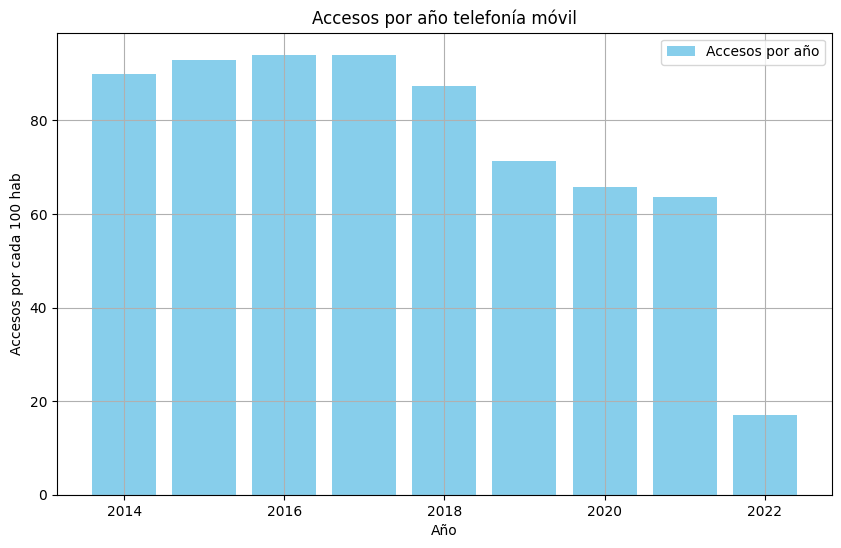

In [244]:
# Graficar los accesos por año
plt.figure(figsize=(10, 6))
plt.bar(accesos_por_anio.index, accesos_por_anio.values, color='skyblue', label='Accesos por año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Accesos por año telefonía móvil')
plt.legend()
plt.grid(True)
plt.show()



In [115]:
n_fija_accesos_habitantes_trim

# Calcular los accesos por año usando groupby y sum()
accesos_por_anio = n_fija_accesos_habitantes_trim.groupby('Año')['Accesos telefonía fija por cada 100 hab'].sum()

# Calcular el promedio de accesos por año usando groupby y mean()
promedio_accesos_por_anio = n_fija_accesos_habitantes_trim.groupby('Año')['Accesos telefonía fija por cada 100 hab'].mean()

# Calcular la suma total de accesos
suma_total_accesos = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hab'].sum()

# Calcular el promedio total de accesos
promedio_total_accesos = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hab'].median().round(2)

# Calcular el promedio total de accesos
promedio_total_accesos_hogar = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hogares'].median().round(2)

# Imprimir los resultados

print("Accesos por año telefoía fija:")
print(accesos_por_anio)
print("Promedio de accesos por año telefoía fija:")
print(promedio_accesos_por_anio)
print("Suma total de accesos telefoía fija:", suma_total_accesos)
print("Mediana total de accesos telefoía fija:", promedio_total_accesos)
print("Mediana total de accesos telefoía fija por hogar:", promedio_total_accesos_hogar)

Accesos por año telefoía fija:
Año
2014    89.99
2015    92.94
2016    94.04
2017    94.04
2018    87.27
2019    71.43
2020    65.67
2021    63.69
2022    16.96
Name: Accesos telefonía fija por cada 100 hab, dtype: float64
Promedio de accesos por año telefoía fija:
Año
2014    22.4975
2015    23.2350
2016    23.5100
2017    23.5100
2018    21.8175
2019    17.8575
2020    16.4175
2021    15.9225
2022    16.9600
Name: Accesos telefonía fija por cada 100 hab, dtype: float64
Suma total de accesos telefoía fija: 676.03
Mediana total de accesos telefoía fija: 21.95
Mediana total de accesos telefoía fija por hogar: 71.07


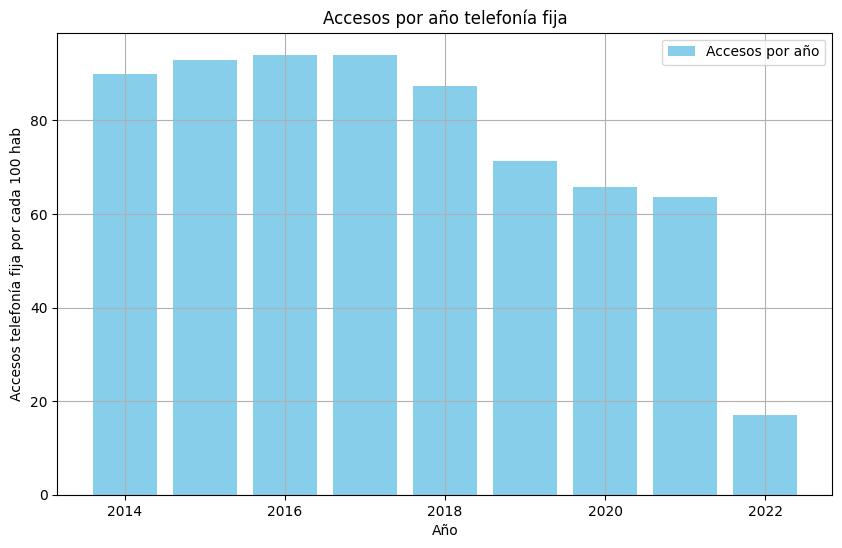

In [245]:
# Graficar los accesos por año
plt.figure(figsize=(10, 6))
plt.bar(accesos_por_anio.index, accesos_por_anio.values, color='skyblue', label='Accesos por año')
plt.xlabel('Año')
plt.ylabel('Accesos telefonía fija por cada 100 hab')
plt.title('Accesos por año telefonía fija')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Obtener las 5 provincias con mayor acceso a telefonía fija total
top_provincias_total = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (total)'].sum().nlargest(5)

# Obtener las 5 provincias con menor acceso a telefonía fija total
bottom_provincias_total = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (total)'].sum().nsmallest(5)

# Obtener las 5 provincias con mayor acceso a telefonía fija por tipo
top_provincias_comercial = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (comercial)'].sum().nlargest(5)
top_provincias_hogares = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (hogares)'].sum().nlargest(5)
top_provincias_gobierno = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (gobierno)'].sum().nlargest(5)
top_provincias_otros = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (otros)'].sum().nlargest(5)

# Obtener las 5 provincias con menor acceso a telefonía fija por tipo
bottom_provincias_comercial = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (comercial)'].sum().nsmallest(5)
bottom_provincias_hogares = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (hogares)'].sum().nsmallest(5)
bottom_provincias_gobierno = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (gobierno)'].sum().nsmallest(5)
bottom_provincias_otros = p_fija_accesos_tipos_trim.groupby('Provincia')['Accesos telefonía fija (otros)'].sum().nsmallest(5)

In [118]:
# Imprimir los resultados con comas para dividir los miles
print("Provincias con mayor acceso a telefonía fija total:")
print(top_provincias_total.apply(lambda x: '{:,}'.format(x)))

print("\nProvincias con menor acceso a telefonía fija total:")
print(bottom_provincias_total.apply(lambda x: '{:,}'.format(x)))

Provincias con mayor acceso a telefonía fija total:
Provincia
Buenos Aires       136,367,335
Capital Federal     51,687,928
Santa Fe            22,918,902
Córdoba             21,623,111
Mendoza              9,861,252
Name: Accesos telefonía fija (total), dtype: object

Provincias con menor acceso a telefonía fija total:
Provincia
Tierra del Fuego    1,001,791
La Rioja            1,116,149
Catamarca           1,177,348
Formosa             1,272,757
Santa Cruz          1,311,696
Name: Accesos telefonía fija (total), dtype: object


In [107]:
print("\nProvincias con mayor acceso a telefonía fija (comercial):")
print(top_provincias_comercial.apply(lambda x: '{:,}'.format(x)))

print("\nProvincias con menor acceso a telefonía fija (comercial):")
print(bottom_provincias_comercial.apply(lambda x: '{:,}'.format(x)))


Provincias con mayor acceso a telefonía fija (comercial):
Provincia
Buenos Aires       11,389
Capital Federal     4,282
Santa Fe            1,905
Córdoba             1,801
Mendoza               810
Name: Accesos telefonía fija (comercial), dtype: object

Provincias con menor acceso a telefonía fija (comercial):
Provincia
Tierra del Fuego    61
La Rioja            76
Catamarca           80
Formosa             82
Santa Cruz          97
Name: Accesos telefonía fija (comercial), dtype: object


In [104]:
print("\nProvincias con mayor acceso a telefonía fija (hogares):")
print(top_provincias_hogares.apply(lambda x: '{:,}'.format(x)))

print("\nProvincias con menor acceso a telefonía fija (hogares):")
print(bottom_provincias_hogares.apply(lambda x: '{:,}'.format(x)))


Provincias con mayor acceso a telefonía fija (hogares):
Provincia
Capital Federal     3,920.08
Buenos Aires        2,450.08
La Pampa            2,147.07
Tierra del Fuego    2,117.74
Santa Fe            2,103.66
Name: Accesos telefonía fija por cada 100 hogares, dtype: object

Provincias con menor acceso a telefonía fija (hogares):
Provincia
Formosa                  845.76
Jujuy                    902.89
Santiago del Estero      925.15
Chaco                  1,002.39
Misiones               1,020.62
Name: Accesos telefonía fija por cada 100 hogares, dtype: object


In [108]:
print("\nProvincias con mayor acceso a telefonía fija (gobierno):")
print(top_provincias_gobierno.apply(lambda x: '{:,}'.format(x)))

print("\nProvincias con menor acceso a telefonía fija (gobierno):")
print(bottom_provincias_gobierno.apply(lambda x: '{:,}'.format(x)))


Provincias con mayor acceso a telefonía fija (gobierno):
Provincia
Entre Ríos    27,282
Tucumán       25,919
Salta         16,441
Río Negro     15,122
Misiones      13,425
Name: Accesos telefonía fija (gobierno), dtype: object

Provincias con menor acceso a telefonía fija (gobierno):
Provincia
Córdoba                66
Santa Fe               67
Capital Federal       184
Buenos Aires          518
Tierra del Fuego    3,906
Name: Accesos telefonía fija (gobierno), dtype: object


In [109]:
print("\nProvincias con mayor acceso a telefonía fija (otros):")
print(top_provincias_otros.apply(lambda x: '{:,}'.format(x)))

print("\nProvincias con menor acceso a telefonía fija (otros):")
print(bottom_provincias_otros.apply(lambda x: '{:,}'.format(x)))


Provincias con mayor acceso a telefonía fija (otros):
Provincia
San Luis            7,900
Tierra del Fuego    7,753
Formosa             7,647
La Rioja            7,085
Jujuy               7,038
Name: Accesos telefonía fija (otros), dtype: object

Provincias con menor acceso a telefonía fija (otros):
Provincia
La Pampa       87
Neuquén       107
San Juan      108
Chaco         110
Corrientes    113
Name: Accesos telefonía fija (otros), dtype: object


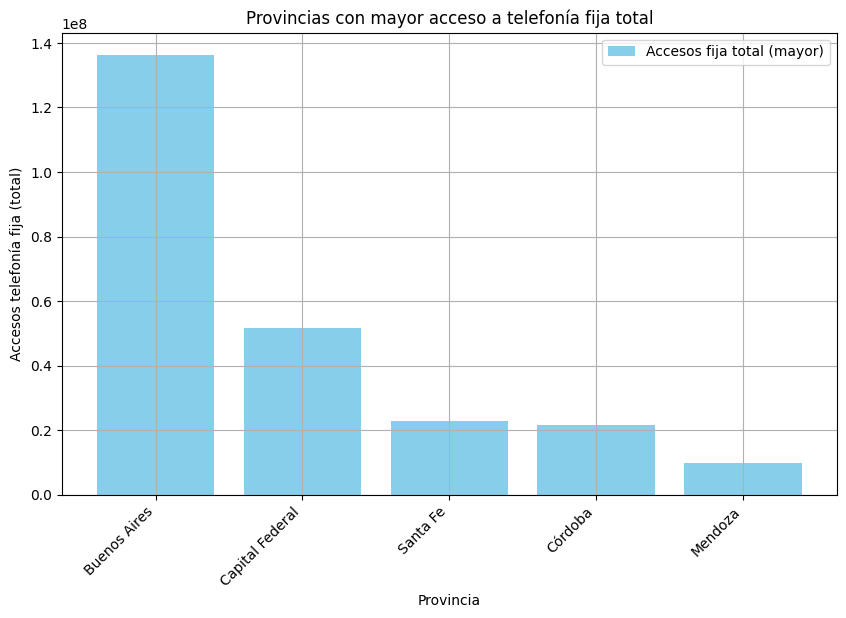

In [248]:
# Graficar las provincias con mayor acceso a telefonía fija total
plt.figure(figsize=(10, 6))
plt.bar(top_provincias_total.index, top_provincias_total.values, color='skyblue', label='Accesos fija total (mayor)')
plt.xlabel('Provincia')
plt.ylabel('Accesos telefonía fija (total)')
plt.title('Provincias con mayor acceso a telefonía fija total')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()






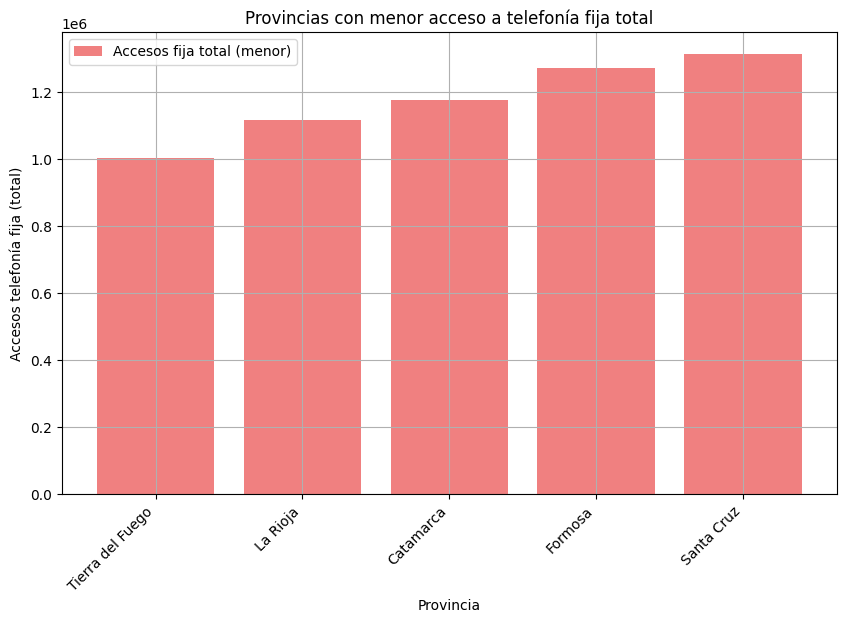

In [249]:
# Graficar las provincias con menor acceso a telefonía fija total
plt.figure(figsize=(10, 6))
plt.bar(bottom_provincias_total.index, bottom_provincias_total.values, color='lightcoral', label='Accesos fija total (menor)')
plt.xlabel('Provincia')
plt.ylabel('Accesos telefonía fija (total)')
plt.title('Provincias con menor acceso a telefonía fija total')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [89]:
# Obtener las 5 provincias con mayor acceso a telefonía fija por cada 100 habitantes
top_provincias_habitantes = p_fija_accesos_habitantes_trim.groupby('Provincia')['Accesos telefonía fija por cada 100 hab'].sum().nlargest(5)

# Obtener las 5 provincias con menor acceso a telefonía fija por cada 100 habitantes
bottom_provincias_habitantes = p_fija_accesos_habitantes_trim.groupby('Provincia')['Accesos telefonía fija por cada 100 hab'].sum().nsmallest(5)

# Obtener las 5 provincias con mayor acceso a telefonía fija por cada 100 hogares
top_provincias_hogares = p_fija_accesos_habitantes_trim.groupby('Provincia')['Accesos telefonía fija por cada 100 hogares'].sum().nlargest(5)

# Obtener las 5 provincias con menor acceso a telefonía fija por cada 100 hogares
bottom_provincias_hogares = p_fija_accesos_habitantes_trim.groupby('Provincia')['Accesos telefonía fija por cada 100 hogares'].sum().nsmallest(5)


In [87]:
print("Provincias con mayor acceso a telefonía fija por cada 100 habitantes:")
print(top_provincias_habitantes.apply('{:,}'.format))

print("\nProvincias con menor acceso a telefonía fija por cada 100 habitantes:")
print(bottom_provincias_habitantes.apply('{:,}'.format))

Provincias con mayor acceso a telefonía fija por cada 100 habitantes:
Provincia
Capital Federal     1,641.24
Buenos Aires          788.92
La Pampa              707.43
Santa Fe              661.51
Tierra del Fuego      627.93
Name: Accesos telefonía fija por cada 100 hab, dtype: object

Provincias con menor acceso a telefonía fija por cada 100 habitantes:
Provincia
Formosa                215.26
Santiago del Estero    229.59
Jujuy                  230.87
Chaco                  267.92
Misiones               277.99
Name: Accesos telefonía fija por cada 100 hab, dtype: object


In [88]:
print("\nProvincias con mayor acceso a telefonía fija por cada 100 hogares:")
print(top_provincias_hogares.apply('{:,}'.format))

print("\nProvincias con menor acceso a telefonía fija por cada 100 hogares:")
print(bottom_provincias_hogares.apply('{:,}'.format))


Provincias con mayor acceso a telefonía fija por cada 100 hogares:
Provincia
Capital Federal     3,920.08
Buenos Aires        2,450.08
La Pampa            2,147.07
Tierra del Fuego    2,117.74
Santa Fe            2,103.66
Name: Accesos telefonía fija por cada 100 hogares, dtype: object

Provincias con menor acceso a telefonía fija por cada 100 hogares:
Provincia
Formosa                  845.76
Jujuy                    902.89
Santiago del Estero      925.15
Chaco                  1,002.39
Misiones               1,020.62
Name: Accesos telefonía fija por cada 100 hogares, dtype: object


In [237]:
# Obtener las 5 provincias con mayor acceso a internet por cada 100 hogares
top_provincias_hogares_i = p_internet_accesos_habitantes_trim.groupby('Provincia')['Accesos por cada 100 hogares'].sum().nlargest(5)

# Obtener las 5 provincias con menor acceso a internet por cada 100 hogares
bottom_provincias_hogares_i = p_internet_accesos_habitantes_trim.groupby('Provincia')['Accesos por cada 100 hogares'].sum().nsmallest(5)

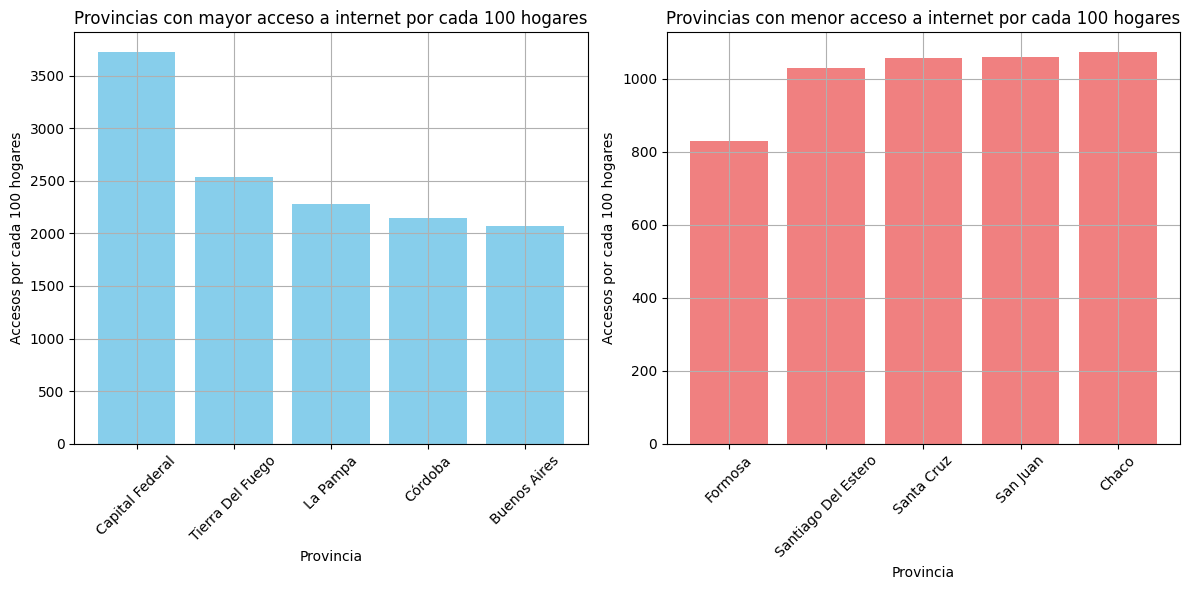

In [238]:


# Datos
top_provincias_hogares = top_provincias_hogares_i.index.tolist()
bottom_provincias_hogares = bottom_provincias_hogares_i.index.tolist()
accesos_top = top_provincias_hogares_i.values.tolist()
accesos_bottom = bottom_provincias_hogares_i.values.tolist()

# Crear los gráficos de barras
plt.figure(figsize=(12, 6))

# Gráfico para provincias con mayor acceso
plt.subplot(1, 2, 1)
plt.bar(top_provincias_hogares, accesos_top, color='skyblue')
plt.title('Provincias con mayor acceso a internet por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.grid()

# Gráfico para provincias con menor acceso
plt.subplot(1, 2, 2)
plt.bar(bottom_provincias_hogares, accesos_bottom, color='lightcoral')
plt.title('Provincias con menor acceso a internet por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
p_fija_accesos_tipos_trim
# Calcular los accesos por año usando groupby y sum()
accesos_por_anio = n_fija_accesos_habitantes_trim.groupby('Año')['Accesos telefonía fija por cada 100 hab'].sum()

# Calcular el promedio de accesos por año usando groupby y mean()
promedio_accesos_por_anio = n_fija_accesos_habitantes_trim.groupby('Año')['Accesos telefonía fija por cada 100 hab'].mean()

# Calcular la suma total de accesos
suma_total_accesos = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hab'].sum()

# Calcular el promedio total de accesos
promedio_total_accesos = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hab'].median().round(2)

# Calcular el promedio total de accesos
promedio_total_accesos_hogar = n_fija_accesos_habitantes_trim['Accesos telefonía fija por cada 100 hogares'].median().round(2)

# Imprimir los resultados

print("Accesos por año telefoía fija:")
print(accesos_por_anio)
print("Promedio de accesos por año telefoía fija:")
print(promedio_accesos_por_anio)
print("Suma total de accesos telefoía fija:", suma_total_accesos)
print("Mediana total de accesos telefoía fija:", promedio_total_accesos)
print("Mediana total de accesos telefoía fija por hogar:", promedio_total_accesos_hogar)

In [130]:
n_internet_tipo_trim.head()
# Obtener el total de ADSL por año
total_adsl_por_anio = n_internet_tipo_trim.groupby('Año')['ADSL'].sum()

# Obtener el total de Cablemodem por año
total_cablemodem_por_anio = n_internet_tipo_trim.groupby('Año')['Cablemodem'].sum()

# Obtener el total de Fibra óptica por año
total_fibra_optica_por_anio = n_internet_tipo_trim.groupby('Año')['Fibra óptica'].sum()

# Obtener el total de Wireless por año
total_wireless_por_anio = n_internet_tipo_trim.groupby('Año')['Wireless'].sum()

# Obtener el total de Otros por año
total_otros_por_anio = n_internet_tipo_trim.groupby('Año')['Otros'].sum()

# Obtener el total general por año
total_general_por_anio = n_internet_tipo_trim.groupby('Año')['Total'].sum()

# Obtener el total de todos los años juntos por tipo de conexión
total_adsl = n_internet_tipo_trim['ADSL'].sum()
total_cablemodem = n_internet_tipo_trim['Cablemodem'].sum()
total_fibra_optica = n_internet_tipo_trim['Fibra óptica'].sum()
total_wireless = n_internet_tipo_trim['Wireless'].sum()
total_otros = n_internet_tipo_trim['Otros'].sum()
total_general = n_internet_tipo_trim['Total'].sum()

# Imprimir los resultados
print("Total de ADSL por año:")
print(total_adsl_por_anio)

print("\nTotal de Cablemodem por año:")
print(total_cablemodem_por_anio)

print("\nTotal de Fibra óptica por año:")
print(total_fibra_optica_por_anio)

print("\nTotal de Wireless por año:")
print(total_wireless_por_anio)

print("\nTotal de Otros por año:")
print(total_otros_por_anio)

print("\nTotal general por año:")
print(total_general_por_anio)


Total de ADSL por año:
Año
2014    14884750
2015    15115694
2016    15073814
2017    14639302
2018    13981984
2019    11447626
2020     9072828
2021     7802044
2022     1533240
Name: ADSL, dtype: int64

Total de Cablemodem por año:
Año
2014     9975087
2015    11162971
2016    12177088
2017    14148063
2018    16571272
2019    18754974
2020    20539964
2021    22877010
2022     6073426
Name: Cablemodem, dtype: int64

Total de Fibra óptica por año:
Año
2014     604862
2015     620877
2016     680127
2017     766312
2018    1079124
2019    3191409
2020    4636620
2021    6473506
2022    2219533
Name: Fibra óptica, dtype: int64

Total de Wireless por año:
Año
2014     303
2015     330
2016     336
2017     430
2018     869
2019    1262
2020    1562
2021    1925
2022     545
Name: Wireless, dtype: int64

Total de Otros por año:
Año
2014     285
2015     241
2016     226
2017     342
2018     463
2019     908
2020     957
2021    1005
2022     251
Name: Otros, dtype: int64

Total general

In [124]:
# Imprimir los resultados 
print(f"Total de ADSL acumulado: {total_adsl:,}")
print(f"Total de Cablemodem acumulado: {total_cablemodem:,}")
print(f"Total de Fibra óptica acumulado: {total_fibra_optica:,}")
print(f"Total de Wireless acumulado: {total_wireless:,}")
print(f"Total de Otros acumulado: {total_otros:,}")
print(f"Total general acumulado: {total_general:,}")




Total de ADSL acumulado: 103,551,282
Total de Cablemodem acumulado: 132,279,855
Total de Fibra óptica acumulado: 20,272,370
Total de Wireless acumulado: 7,562
Total de Otros acumulado: 4,678
Total general acumulado: 268,373,204


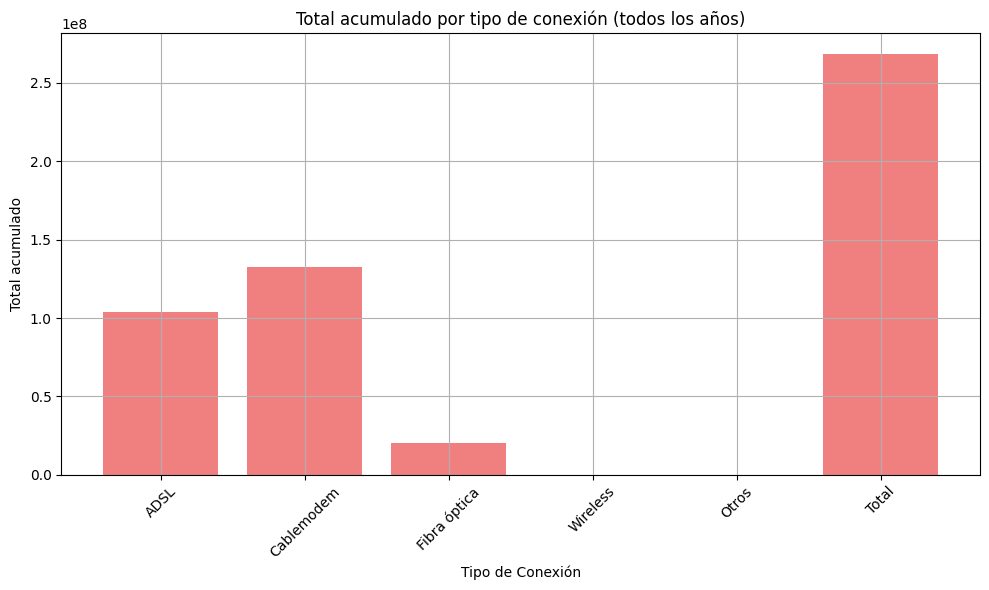

In [231]:

tipos_conexion = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
totales_acumulados = [total_adsl, total_cablemodem, total_fibra_optica, total_wireless, total_otros, total_general]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tipos_conexion, totales_acumulados, color='lightcoral')
plt.title('Total acumulado por tipo de conexión (todos los años)')
plt.xlabel('Tipo de Conexión')
plt.ylabel('Total acumulado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


In [125]:
# Imprimir los resultados
print("Total de ADSL por año:")
print(total_adsl_por_anio)

print("\nTotal de Cablemodem por año:")
print(total_cablemodem_por_anio)

print("\nTotal de Fibra óptica por año:")
print(total_fibra_optica_por_anio)

print("\nTotal de Wireless por año:")
print(total_wireless_por_anio)

print("\nTotal de Otros por año:")
print(total_otros_por_anio)

print("\nTotal general por año:")
print(total_general_por_anio)

Total de ADSL por año:
Año
2014    14884750
2015    15115694
2016    15073814
2017    14639302
2018    13981984
2019    11447626
2020     9072828
2021     7802044
2022     1533240
Name: ADSL, dtype: int64

Total de Cablemodem por año:
Año
2014     9975087
2015    11162971
2016    12177088
2017    14148063
2018    16571272
2019    18754974
2020    20539964
2021    22877010
2022     6073426
Name: Cablemodem, dtype: int64

Total de Fibra óptica por año:
Año
2014     604862
2015     620877
2016     680127
2017     766312
2018    1079124
2019    3191409
2020    4636620
2021    6473506
2022    2219533
Name: Fibra óptica, dtype: int64

Total de Wireless por año:
Año
2014     303
2015     330
2016     336
2017     430
2018     869
2019    1262
2020    1562
2021    1925
2022     545
Name: Wireless, dtype: int64

Total de Otros por año:
Año
2014     285
2015     241
2016     226
2017     342
2018     463
2019     908
2020     957
2021    1005
2022     251
Name: Otros, dtype: int64

Total general

> En el periodo estudiado tenemos una mediana de 138 de accesos a telefonía móvil por cada 100 habitantes, indicando esto que hay habitantes que tienen más de 1 acceso
>                         tenemos una mediana de 22 de accesos a telefonía fija por cada 100 habitantes, indicando esto la mayoría de habitantes tienen tienen una telefonía fija por hogar o ya no consumen telefonía fija, corroborando esto al obtener una mediana de 71 por cada 100 hogares

>  Podemos observar que el tipo de tecnología más utilizado en el periodo estudiado es Cablemodem y el menos utilizado es Otro

> Podemos observar que las provincias con mayor acceso a telefonía fija son: Buenos Aires, Capital Federal, Santa Fe, Córdoba y Mendoza. Este resultado es consistente al subdividirlo los accesos en hogares, comerciales y gobierno
>                                         menor acceso a telefonía fija son: Tierra del Fuego, La Rioja, Catamarca, Formosa y Santa Cruz.Este resultado es consistente al subdividirlo los accesos en hogares, comerciales y gobierno

> Podemos observar que las provincias con mayor acceso a telefonía fija por hogares y habitantes son: Capital Federal, Buenos Aires, La Pampa, Santa Fe y Tierra del Fuego
>                                         menor acceso a telefonía fija por hogares y habitantes son: Formosa, Jujuy, Santiago del Estero, Chaco y Misiones   
Llama la atención que Tierra de Fuego esta entre las provincias con menor acceso a telefoía fija pero es de las provincias con mayor acceso a telefonía por hogar y habitantes.      

> Podemos observar que las provincias con mayor acceso a internet por hogares son: Capital Federal, Tierra Del Fuego, La Pampa, Córdoba y Buenos Aires   
>                                         menor acceso a internet por hogares son: Formosa, Santiago Del Estero, Santa Cruz, San Juan y Chaco   

### Velocidad Internet

In [139]:
# Obtener el promedio de la columna "Mbps (Media de bajada)" por año
promedio_mbps_por_anio = n_internet_accesos_velocidadMedia_trim.groupby('Año')['Mbps (Media de bajada)'].mean()

# Imprimir los resultados con formato de dos decimales
print(promedio_mbps_por_anio.round(2))


Año
2014     3.85
2015     4.67
2016     5.70
2017     8.53
2018    14.60
2019    22.54
2020    39.72
2021    47.39
2022    55.11
Name: Mbps (Media de bajada), dtype: float64


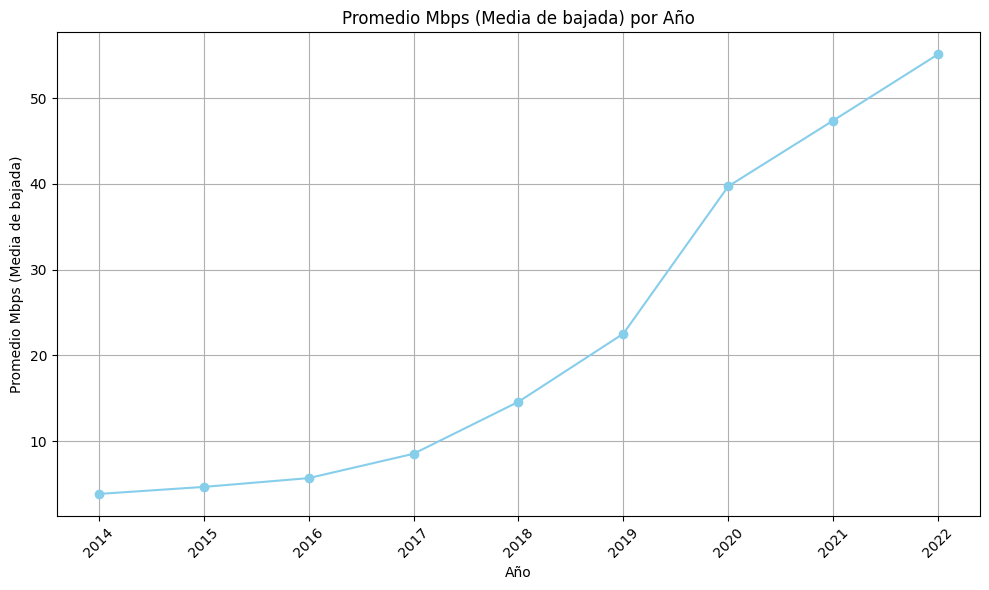

In [230]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
promedio_mbps_por_anio.plot(kind='line', marker='o', color='skyblue')
plt.title('Promedio Mbps (Media de bajada) por Año')
plt.xlabel('Año')
plt.ylabel('Promedio Mbps (Media de bajada)')
plt.xticks(promedio_mbps_por_anio.index, rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [223]:

# Agrupar por provincia y calcular el promedio de Mbps (Media de bajada) para cada provincia
promedio_mbps_por_provincia = p_internet_accesos_velocidadMedia_trim.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Obtener las 5 provincias con mayor Mbps (Media de bajada)
top_provincias_mayor_mbps = promedio_mbps_por_provincia.nlargest(5)

# Obtener las 5 provincias con menor Mbps (Media de bajada)
bottom_provincias_menor_mbps = promedio_mbps_por_provincia.nsmallest(5)

# Imprimir los resultados
print("Promedio de Mbps (Media de bajada) por provincia:")
print(promedio_mbps_por_provincia)

print("\nLas 5 provincias con mayor Mbps (Media de bajada):")
print(top_provincias_mayor_mbps)

print("\nLas 5 provincias con menor Mbps (Media de bajada):")
print(bottom_provincias_menor_mbps)


Promedio de Mbps (Media de bajada) por provincia:
Provincia
Buenos Aires          21.97
Capital Federal       29.39
Catamarca             15.52
Chaco                 16.12
Chubut                 5.24
Corrientes            13.55
Córdoba               17.45
Entre Ríos            12.58
Formosa               11.15
Jujuy                 10.61
La Pampa               5.73
La Rioja              10.45
Mendoza                7.30
Misiones              14.24
Neuquén               16.24
Río Negro             11.27
Salta                 12.76
San Juan               5.06
San Luis              10.85
Santa Cruz             5.12
Santa Fe              14.09
Santiago Del Estero    7.00
Tierra Del Fuego       5.55
Tucumán               17.21
Name: Mbps (Media de bajada), dtype: float64

Las 5 provincias con mayor Mbps (Media de bajada):
Provincia
Capital Federal   29.39
Buenos Aires      21.97
Córdoba           17.45
Tucumán           17.21
Neuquén           16.24
Name: Mbps (Media de bajada), dtype: floa

In [224]:
print("\nLas 5 provincias con mayor Mbps (Media de bajada):")
print(top_provincias_mayor_mbps)

print("\nLas 5 provincias con menor Mbps (Media de bajada):")
print(bottom_provincias_menor_mbps)



Las 5 provincias con mayor Mbps (Media de bajada):
Provincia
Capital Federal   29.39
Buenos Aires      21.97
Córdoba           17.45
Tucumán           17.21
Neuquén           16.24
Name: Mbps (Media de bajada), dtype: float64

Las 5 provincias con menor Mbps (Media de bajada):
Provincia
San Juan           5.06
Santa Cruz         5.12
Chubut             5.24
Tierra Del Fuego   5.55
La Pampa           5.73
Name: Mbps (Media de bajada), dtype: float64


In [228]:

# Filtrar los datos solo para el año 2022
datos_2022 = p_internet_accesos_velocidadMedia_trim[p_internet_accesos_velocidadMedia_trim['Año'] == 2022]

# Agrupar por provincia y calcular el promedio de Mbps (Media de bajada) para cada provincia en el año 2022
promedio_mbps_por_provincia_2022 = datos_2022.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Obtener las 5 provincias con mayor Mbps (Media de bajada) en el año 2022
top_provincias_mayor_mbps_2022 = promedio_mbps_por_provincia_2022.nlargest(5)

# Imprimir los resultados
print("Las 5 provincias con mayor Mbps (Media de bajada) en el año 2022:")
print(top_provincias_mayor_mbps_2022)




Las 5 provincias con mayor Mbps (Media de bajada) en el año 2022:
Provincia
Capital Federal   88.00
Buenos Aires      63.00
Catamarca         51.00
Córdoba           50.00
Tucumán           47.00
Name: Mbps (Media de bajada), dtype: float64


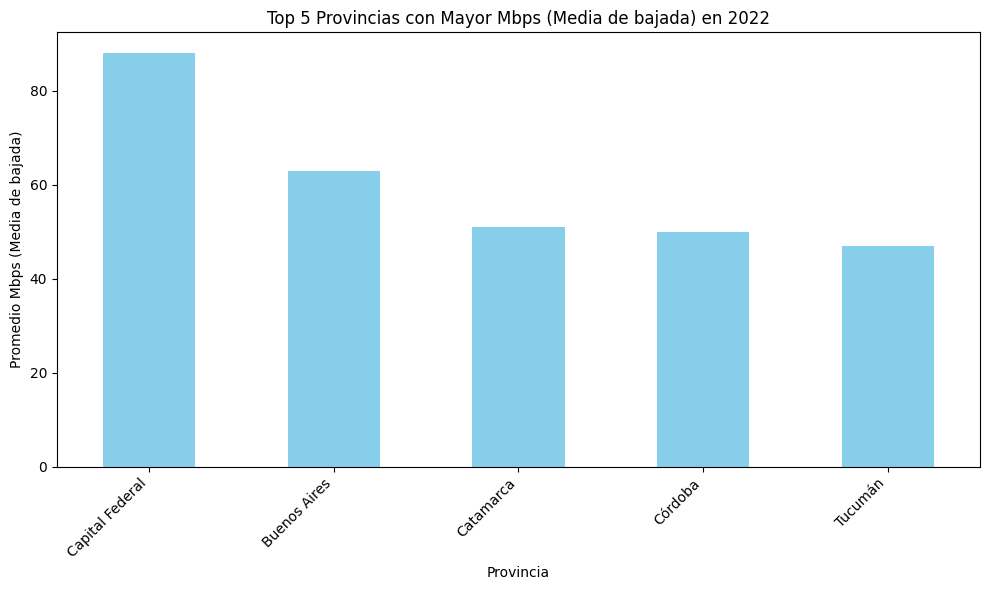

In [229]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_provincias_mayor_mbps_2022.plot(kind='bar', color='skyblue')
plt.title('Top 5 Provincias con Mayor Mbps (Media de bajada) en 2022')
plt.xlabel('Provincia')
plt.ylabel('Promedio Mbps (Media de bajada)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Las provincias con mayor mbps son: capital federal, buenos aires, catamarca, cordoba y tucuman
Las provincias con menor mbps son: san juan

Las provincias con menor mbps son: san juan, santa cruz, Chubut, Tierra del fuego y LaPampa
Podemos observar que el promedio de Mbps ha aumentado significativamente entre el 2014 y el 2022.
Haciendo referencia al análisis de acceso a servicios, podemos ver que capital federal, buenos aires y córdoba son de las provincias con mayor número de accesos a internet y son las que tienen mayor Mbps. Tierra de fuego y La Pampa, aunque son de las provincias con mayor numero de accesos, están en las provincias con menor Mbpm. San Juan y Santa Cruz están en las provincias con menor numero de accesos y menor Mbpm


### Líder de mercado

In [28]:

# Obtener los totales y promedios acumulados de todos los años por operador
total_acumulado_personal = movil_altas_mens['Personal'].sum()
total_acumulado_claro = movil_altas_mens['Claro'].sum()
total_acumulado_nextel = movil_altas_mens['Nextel'].sum()
total_acumulado_movistar = movil_altas_mens['Movistar'].sum()
total_acumulado_general = movil_altas_mens['Total general'].sum()

mediana_acumulado_personal = movil_altas_mens['Personal'].median()
mediana_acumulado_claro = movil_altas_mens['Claro'].median()
mediana_acumulado_nextel = movil_altas_mens['Nextel'].median()
mediana_acumulado_movistar = movil_altas_mens['Movistar'].median()
mediana_acumulado_general = movil_altas_mens['Total general'].median()

# Imprimir los resultados

print("Total acumulado de altas por Personal:", '{:,.0f}'.format(total_acumulado_personal))
print("Total acumulado de altas por Claro:", '{:,.0f}'.format(total_acumulado_claro))
print("Total acumulado de altas por Nextel:", '{:,.0f}'.format(total_acumulado_nextel))
print("Total acumulado de altas por Movistar:", '{:,.0f}'.format(total_acumulado_movistar))
print("Total acumulado de altas general:", '{:,.0f}'.format(total_acumulado_general))

print("Mediana acumulada de altas por Personal:", '{:,.2f}'.format(mediana_acumulado_personal))
print("Mediana acumulada de altas por Claro:", '{:,.2f}'.format(mediana_acumulado_claro))
print("Mediana acumulada de altas por Nextel:", '{:,.2f}'.format(mediana_acumulado_nextel))
print("Mediana acumulada de altas por Movistar:", '{:,.2f}'.format(mediana_acumulado_movistar))
print("Mediana acumulada total de altas:", '{:,.2f}'.format(mediana_acumulado_general))



Total acumulado de altas por Personal: 5,607,859
Total acumulado de altas por Claro: 6,181,085
Total acumulado de altas por Nextel: 9,868
Total acumulado de altas por Movistar: 5,545,365
Total acumulado de altas general: 17,344,177
Mediana acumulada de altas por Personal: 38,920.00
Mediana acumulada de altas por Claro: 49,463.50
Mediana acumulada de altas por Nextel: 12.00
Mediana acumulada de altas por Movistar: 41,693.00
Mediana acumulada total de altas: 123,836.00


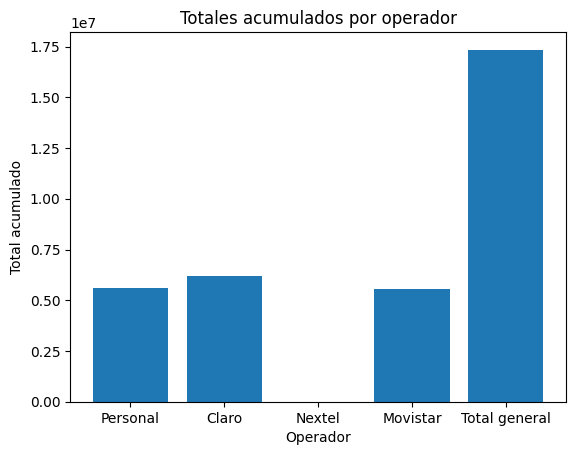

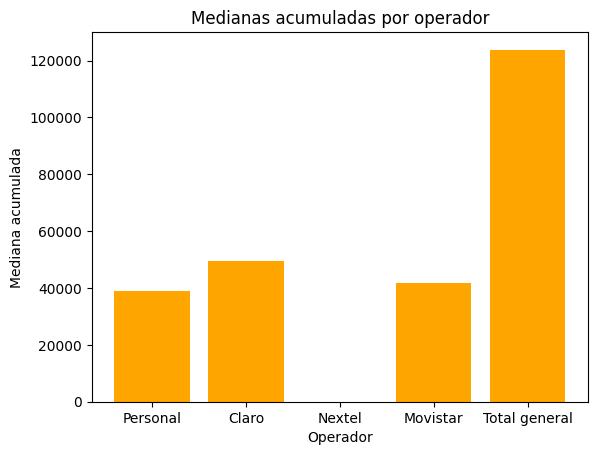

In [240]:

# Lista de operadores
operadores = ['Personal', 'Claro', 'Nextel', 'Movistar', 'Total general']

# Lista de totales acumulados por operador
totales_acumulados = [total_acumulado_personal, total_acumulado_claro, total_acumulado_nextel, total_acumulado_movistar, total_acumulado_general]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar los totales acumulados por operador
ax.bar(operadores, totales_acumulados)

# Agregar etiquetas a los ejes
ax.set_xlabel('Operador')
ax.set_ylabel('Total acumulado')

# Agregar título a la gráfica
ax.set_title('Totales acumulados por operador')

# Mostrar la gráfica
plt.show()

# Lista de medianas acumuladas por operador
medianas_acumuladas = [mediana_acumulado_personal, mediana_acumulado_claro, mediana_acumulado_nextel, mediana_acumulado_movistar, mediana_acumulado_general]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar las medianas acumuladas por operador
ax.bar(operadores, medianas_acumuladas, color='orange')

# Agregar etiquetas a los ejes
ax.set_xlabel('Operador')
ax.set_ylabel('Mediana acumulada')

# Agregar título a la gráfica
ax.set_title('Medianas acumuladas por operador')

# Mostrar la gráfica
plt.show()



> En el periodo estudiado podemos observar que el operador líder de mercado en telefonía móvil es Claro

In [42]:

# Obtener los totales de prepago por año
total_prepago_por_anio = movil_minutos_trim.groupby('Año')['Minutos prepago salientes (miles)'].sum()

# Obtener los totales de pospago por año
total_pospago_por_anio = movil_minutos_trim.groupby('Año')['Minutos pospago salientes (miles)'].sum()

# Obtener la suma de prepago y pospago por año
suma_prepago_pospago_por_anio = movil_minutos_trim.groupby('Año')[['Minutos prepago salientes (miles)', 'Minutos pospago salientes (miles)']].sum()

# Obtener la mediana de la suma de prepago y pospago
mediana_prepago_pospago = suma_prepago_pospago_por_anio.median()

# Imprimir los resultados con comas como separador de miles
print("Minutos totales de Prepago por año:")
print(total_prepago_por_anio.apply('{:,}'.format))
print("\nMinutos totales de Pospago por año:")
print(total_pospago_por_anio.apply('{:,}'.format))
print("\nSuma de minutos Prepago y Pospago por año:")
print(suma_prepago_pospago_por_anio.applymap('{:,}'.format))
print("\nMediana del acumulado de minutos Prepago y Pospago:")
print(mediana_prepago_pospago.apply('{:,}'.format))

Minutos totales de Prepago por año:
Año
2013    27,276,460
2014    26,564,076
2015    27,559,856
2016    27,452,109
2017    24,192,629
2018    24,600,521
2019    25,743,256
2020    23,625,781
2021    21,720,076
2022     3,588,769
Name: Minutos prepago salientes (miles), dtype: object

Minutos totales de Pospago por año:
Año
2013    38,423,631
2014    44,471,888
2015    45,171,997
2016    50,608,174
2017    59,216,263
2018    57,153,162
2019    52,993,511
2020    57,307,073
2021    52,958,831
2022    12,741,608
Name: Minutos pospago salientes (miles), dtype: object

Suma de minutos Prepago y Pospago por año:
     Minutos prepago salientes (miles) Minutos pospago salientes (miles)
Año                                                                     
2013                        27,276,460                        38,423,631
2014                        26,564,076                        44,471,888
2015                        27,559,856                        45,171,997
2016                

> En el periodo estudiado podemos observar que se consumen más minutos en pospago que en prepago. También podemos observar la tendencia donde los minutos de prepago se van reduciéndo significativamente cada año

### Descripción estadística de los datos

In [187]:
ingresos=pd.read_csv(r"Datasets transformados\ingresos_por_anio.csv")

In [188]:
ingresos.head()

,Año,Trimestre,Ingresos_internet,Ingresos_tel_fija,Ingresos_movil
0,2014,10,13683949,12336089.87,72607710
1,2015,10,20108814,14091890.53,85950000
2,2016,10,26867508,18833594.26,107676433
3,2017,10,39671973,25528578.70,138536546
4,2018,10,59539594,35272511.51,166694340


In [190]:
descripcion_ingresos = ingresos[['Ingresos_internet', 'Ingresos_tel_fija', 'Ingresos_movil']].describe()

print(descripcion_ingresos)


       Ingresos_internet  Ingresos_tel_fija  Ingresos_movil
count               9.00               9.00            9.00
mean         65449663.78        41340943.30    187285092.11
std          51267229.16        32116826.78    121415291.27
min          13683949.00        12336089.87     72607710.00
25%          26867508.00        18833594.26    107676433.00
50%          51432896.00        25528578.70    138536546.00
75%          86772531.00        60145769.91    231880240.00
max         163383869.00       104963473.95    443035884.00


In [200]:

# Agrupar por año y sumar los valores para cada tipo de conexión
agrupado_adsl = n_internet_tipo_trim.groupby('Año')['ADSL'].sum()
agrupado_cablemodem = n_internet_tipo_trim.groupby('Año')['Cablemodem'].sum()
agrupado_fibra_optica = n_internet_tipo_trim.groupby('Año')['Fibra óptica'].sum()
agrupado_wireless = n_internet_tipo_trim.groupby('Año')['Wireless'].sum()
agrupado_otros = n_internet_tipo_trim.groupby('Año')['Otros'].sum()
agrupado_total = n_internet_tipo_trim.groupby('Año')['Total'].sum()

# Crear un nuevo DataFrame con los resultados
tipo_conexion = pd.DataFrame({
    'ADSL': agrupado_adsl,
    'Cablemodem': agrupado_cablemodem,
    'Fibra óptica': agrupado_fibra_optica,
    'Wireless': agrupado_wireless,
    'Otros': agrupado_otros,
    'Total': agrupado_total
})

# Exportar el DataFrame a un archivo CSV
tipo_conexion.to_csv('Datasets transformados/tipo_conexion.csv', index=True)



In [214]:
tipo_conexion=pd.read_csv(r"Datasets transformados\tipo_conexion.csv")

In [206]:
descripcion_conexion = tipo_conexion[['ADSL', 'Cablemodem','Wireless' ,'Fibra óptica']].describe()

print(descripcion_conexion)

             ADSL  Cablemodem  Wireless  Fibra óptica
count        9.00        9.00      9.00          9.00
mean  11505698.00 14697761.67    840.22    2252485.56
std    4639803.09  5441001.46    605.71    2115962.67
min    1533240.00  6073426.00    303.00     604862.00
25%    9072828.00 11162971.00    336.00     680127.00
50%   13981984.00 14148063.00    545.00    1079124.00
75%   14884750.00 18754974.00   1262.00    3191409.00
max   15115694.00 22877010.00   1925.00    6473506.00


### Correlación de las variables

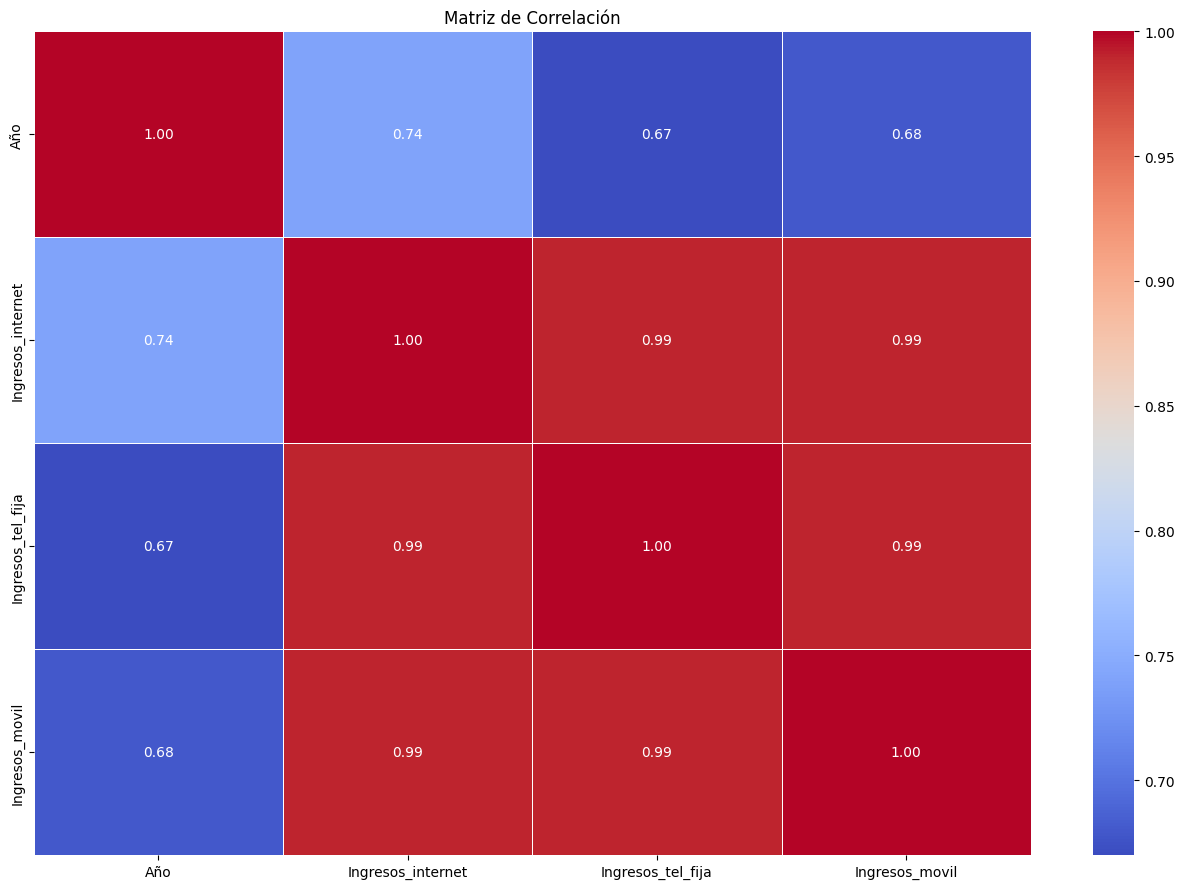

In [194]:

# Seleccionar solo las columnas de interés
columnas_interes = ["Año", "Ingresos_internet", "Ingresos_tel_fija", "Ingresos_movil"]
df_interes = ingresos[columnas_interes]

# Calcular la matriz de correlación
corr_i = df_interes.corr().round(2)

# Crear el heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(data=corr_i, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Matriz de Correlación Ingresos por servicio")
plt.tight_layout()
plt.show()


> Podemos observar que existe una alta correlación positiva entre los ingresos por internet y los ingresos por telefonía móvil, ingresos por internet y los ingresos por telefonía fija. Deduciendo con esto que todos los 3 servicios tienen una alta correlación en sus ingresos
> Podemos observar que hay una coorelación positiva media entre los ingresos de cada servicio y los años analizados

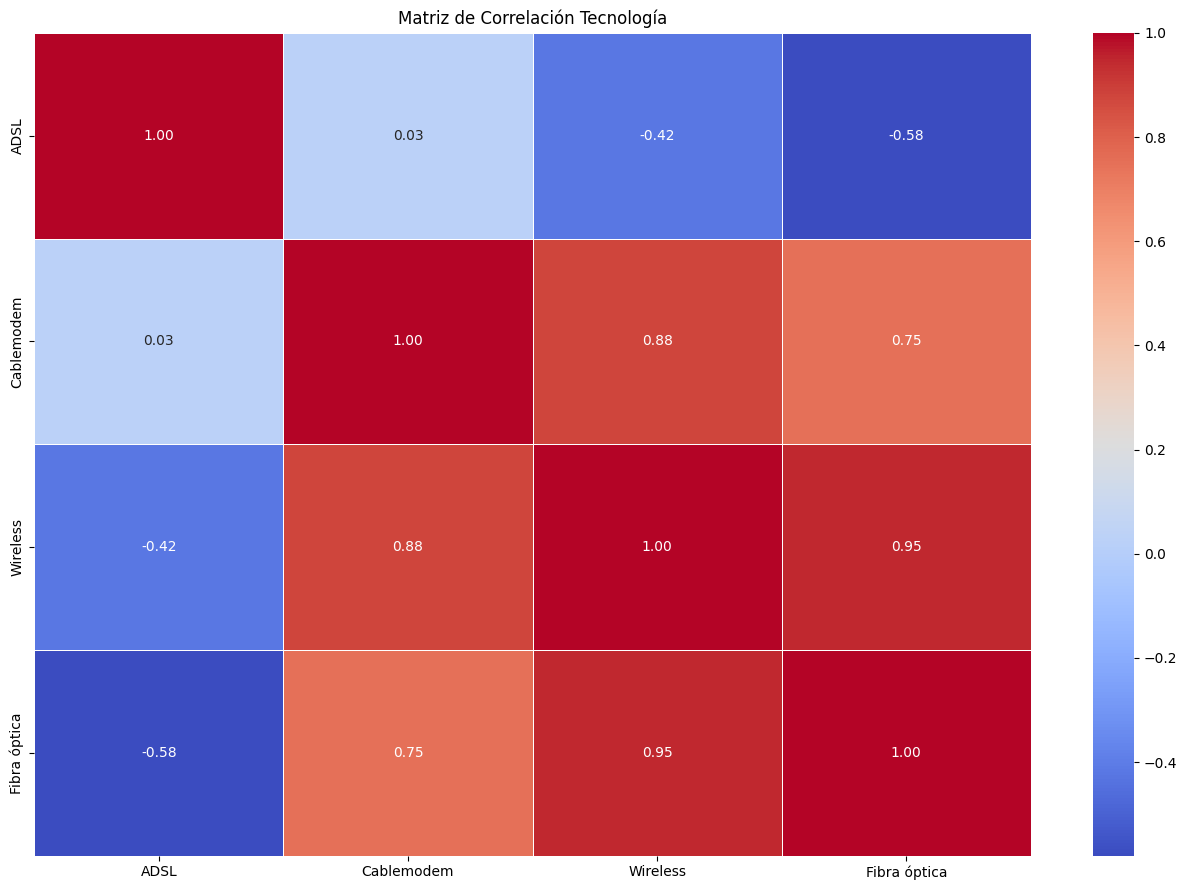

In [208]:
# Seleccionar solo las columnas de interés
columnas_interes_c = ['ADSL', 'Cablemodem','Wireless' ,'Fibra óptica']
df_interes_c = tipo_conexion[columnas_interes_c]

# Calcular la matriz de correlación
corr_c = df_interes_c.corr().round(2)

# Crear el heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(data=corr_c, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Matriz de Correlación Tecnología")
plt.tight_layout()
plt.show()

> Podemos observar que hay una alta correlación positiva entre las tencologías wireless y fibra óptica, cablemodem y wireless
> Tenemos una correlación positiva  media entre las tecnologías cablemodem y fibra óptica
> Tenemos una correlación negativa baja entre ADSL y fibra óptica, wireless y ADSL
> Tenemos una correlación casi nula entre cablemodem y ADSL


### Distribuciones 

In [213]:
# Agrupar los datos por provincia y sumar los accesos por cada 100 hogares
accesos_internet_provincia = p_internet_accesos_habitantes_trim.groupby('Provincia')['Accesos por cada 100 hogares'].sum().reset_index()


# Exportar el DataFrame resultante a un archivo CSV
#accesos_internet_provincia.to_csv('Datasets transformados/Accesos_internet_provincia.csv', index=False)

In [215]:
accesos_internet_provincia=pd.read_csv(r"Datasets transformados\Accesos_internet_provincia.csv")

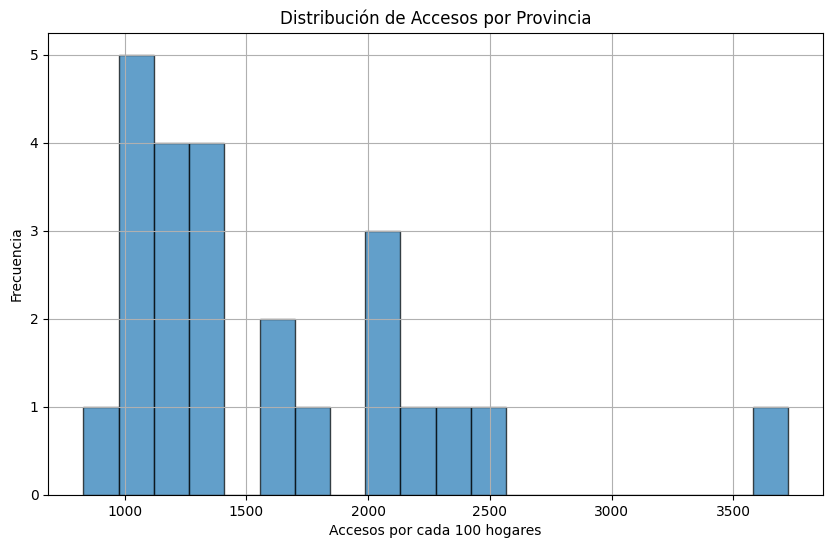

In [217]:

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Graficar la distribución de accesos por provincia
accesos_internet_provincia['Accesos por cada 100 hogares'].plot(kind='hist', bins=20, alpha=0.7, edgecolor='black', ax=ax)

# Personalizar el gráfico
plt.title('Distribución de Accesos por Provincia')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()


> Podemos observar que los accesos a internet no siguen una distribución normal

In [219]:
p_internet_accesos_habitantes_trim.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05
